In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("Dados_Dolar3.csv", sep = ";")
dol

,Data,Abertura,Maxima,Minima,Fechamento,DI25,OURO,WTIBRENT,DXY,MXN,T10USA,BollingerSup,BollingerInf
0,28/08/2017,3522020,3535960,3515320,3535960,10300,1310490,46780,92170,17610,2159,3594860,3499860
1,29/08/2017,3527590,3544880,3524800,3532060,10250,1309500,46310,91620,17816,2129,3595200,3501940
2,30/08/2017,3534840,3542090,3521460,3527040,10240,1308760,45940,92250,17713,2136,3593870,3506690
3,31/08/2017,3536480,3538150,3502030,3512590,10110,1322070,47080,92560,17710,2120,3591930,3510760
4,01/09/2017,3504250,3510920,3483140,3504810,10160,1324970,47330,92100,17760,2166,3592310,3509830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,29/06/2021,4947000,4971500,4922000,4956000,7950,1761080,73450,92072,19820,1471,5166940,4898910
1000,30/06/2021,4975000,5039500,4968500,4986000,8070,1770440,73500,92357,19944,1471,5160010,4917530
1001,01/07/2021,4985000,5071500,4962500,5064500,8170,1776655,75010,92532,20000,1459,5155940,4916360
1002,02/07/2021,5055000,5088500,5002000,5072000,8150,1787450,75100,92243,19743,1431,5155390,4916430


In [62]:
dol["Data"] = pd.to_datetime(dol["Data"]).dt.normalize()
dol = dol.set_index("Data")
dol.head()

,Abertura,Maxima,Minima,Fechamento,DI25,OURO,WTIBRENT,DXY,MXN,T10USA,BollingerSup,BollingerInf
Data,,,,,,,,,,,,
2017-08-28,3522020,3535960,3515320,3535960,10300,1310490,46780,92170,17610,2159,3594860,3499860
2017-08-29,3527590,3544880,3524800,3532060,10250,1309500,46310,91620,17816,2129,3595200,3501940
2017-08-30,3534840,3542090,3521460,3527040,10240,1308760,45940,92250,17713,2136,3593870,3506690
2017-08-31,3536480,3538150,3502030,3512590,10110,1322070,47080,92560,17710,2120,3591930,3510760
2017-01-09,3504250,3510920,3483140,3504810,10160,1324970,47330,92100,17760,2166,3592310,3509830


In [63]:
dol=dol.div(1000)
dol = dol.replace(0, np.NaN)
dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

0

In [64]:
dol["OURO"] = dol["OURO"].pct_change(1)#*100
dol["OURO-1"] = dol["OURO"].shift(1)
dol["OURO-2"] = dol["OURO"].shift(2)
dol["OURO-3"] = dol["OURO"].shift(3)

dol["DXY"] = dol["DXY"].pct_change(1)#*100
dol["DXY-1"] = dol["DXY"].shift(1)
dol["DXY-2"] = dol["DXY"].shift(2)
dol["DXY-3"] = dol["DXY"].shift(3)

dol["WTIBRENT"] = dol["WTIBRENT"].pct_change(1)#*100
dol["WTIBRENT-1"] = dol["WTIBRENT"].shift(1)
dol["WTIBRENT-2"] = dol["WTIBRENT"].shift(2)
dol["WTIBRENT-3"] = dol["WTIBRENT"].shift(3)

dol["MXN"] = dol["MXN"].pct_change(1)#*100
dol["MXN-1"] = dol["MXN"].shift(1)
dol["MXN-2"] = dol["MXN"].shift(2)
dol["MXN-3"] = dol["MXN"].shift(3)

In [65]:
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)

dol["Retorno"] = dol["Fechamento"].pct_change(1)
dol["Retorno-1"] = dol["Retorno"].shift(1)
dol["Retorno-2"] = dol["Retorno-1"].shift(1)
dol["Retorno-3"] = dol["Retorno-2"].shift(1) 

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll5"] = dol["DistBoll"].rolling(5).mean()
dol["MMDistBoll15"] = dol["DistBoll"].rolling(15).mean()

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std15"] = dol["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Maxima"]-dol["Minima"])

# Direção do dia atual
dol["dirD"] = np.where(dol["Fechamento"] > dol["Abertura"], 1, 0)
dol["dirD-1"] = dol["dirD"].shift(1)
dol["dirD-2"] = dol["dirD"].shift(2)
dol["dirD-3"] = dol["dirD"].shift(3)

# Média móvel de 15 dias
dol["MM"] = dol["Fechamento"].rolling(15).mean()

# Zscore
dol["zscore"] = (dol["Fechamento"]-dol["MM"])/dol["std15"]
dol["zscore-1"] = dol["zscore"].shift(1)
dol["zscore-2"] = dol["zscore"].shift(2)
dol["zscore-3"] = dol["zscore"].shift(3)

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["MM"])-1

dol["DistBoll-1"] = dol["DistBoll"].shift(1)
dol["DistBoll-2"] = dol["DistBoll"].shift(2)
dol["DistBoll-3"] = dol["DistBoll"].shift(3)

dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])
dol["Pips-1"] = dol["Pips"].shift(1)
dol["Pips-2"] = dol["Pips"].shift(2)
dol["Pips-3"] = dol["Pips"].shift(3)

In [66]:
dol["std5"] = pd.qcut(dol["std5"], 10, labels = False)
dol["std15"] = pd.qcut(dol["std15"], 10, labels = False)
dol["DI25"] = pd.qcut(dol["DI25"], 10, labels = False)
dol["T10USA"] = pd.qcut(dol["T10USA"], 10, labels = False)
#dol["DistBoll"] = pd.qcut(dol["DistBoll"], 10, labels = False)
#dol["DistBoll-1"] = pd.qcut(dol["DistBoll-1"], 10, labels = False)
dol["prop"] = pd.qcut(dol["prop"], 10, labels = False)
dol["MMDistBoll15"] = pd.qcut(dol["MMDistBoll15"], 10, labels = False)

In [67]:
dol.head()

,Abertura,Maxima,Minima,Fechamento,DI25,OURO,WTIBRENT,DXY,MXN,T10USA,...,zscore-2,zscore-3,RSL,DistBoll-1,DistBoll-2,DistBoll-3,Pips,Pips-1,Pips-2,Pips-3
Data,,,,,,,,,,,,,,,,,,,,,
2017-08-28,3522.02,3535.96,3515.32,3535.96,8,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-29,3527.59,3544.88,3524.80,3532.06,8,-0.000755,-0.010047,-0.005967,0.011698,5,...,NaN,NaN,NaN,95.00,NaN,NaN,3.90,NaN,NaN,NaN
2017-08-30,3534.84,3542.09,3521.46,3527.04,8,-0.000565,-0.007990,0.006876,-0.005781,5,...,NaN,NaN,NaN,93.26,95.00,NaN,5.02,3.90,NaN,NaN
2017-08-31,3536.48,3538.15,3502.03,3512.59,8,0.010170,0.024815,0.003360,-0.000169,5,...,NaN,NaN,NaN,87.18,93.26,95.00,14.45,5.02,3.90,NaN
2017-01-09,3504.25,3510.92,3483.14,3504.81,8,0.002194,0.005310,-0.004970,0.002823,5,...,NaN,NaN,NaN,81.17,87.18,93.26,7.78,14.45,5.02,3.9


In [68]:
dol = dol.drop(["Abertura","Fechamento", "Minima", "Maxima", "BollingerSup", "BollingerInf"], axis = 1)
#"std5", "std15",

In [74]:
dol = dol.dropna(axis=0)

In [75]:
dol.isna().sum().sum()

0

In [76]:
# Treinamento de 2017 a 2020.1
sTrain = "2017-08-28"
eTrain = "2020-06-30"
# Teste de 2020.2 até agora 
sTest = "2020-07-01" #"2020-07-01"
eTest = "2021-07-05"

# dfTrain = dff[dff["Data"] <= eTrain]
# dfTest = dff[dff["Data"] > eTrain]

dolTrain = dol.loc[sTrain : eTrain]
dolTest  = dol.loc[sTest  : eTest]

<ipython-input-76-7dabc5a37393>:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dolTrain = dol.loc[sTrain : eTrain]


In [77]:
dolTrain.tail()

,DI25,OURO,WTIBRENT,DXY,MXN,T10USA,OURO-1,OURO-2,OURO-3,DXY-1,...,zscore-2,zscore-3,RSL,DistBoll-1,DistBoll-2,DistBoll-3,Pips,Pips-1,Pips-2,Pips-3
Data,,,,,,,,,,,,,,,,,,,,,
2020-06-11,2,0.001514,-0.024832,-0.003352,-0.005335,1,0.023828,-0.002699,0.006997,-0.006445,...,-0.294632,1.285036,-0.049800,282.03,265.68,271.26,162.29,124.73,105.69,-11.52
2020-01-12,2,0.021300,-0.022963,-0.003825,-0.001849,2,-0.006213,-0.012394,0.002919,-0.002724,...,-0.806038,-1.003751,-0.029674,450.07,526.75,597.61,125.69,12.01,-7.01,-12.52
2020-02-12,2,0.008893,0.016949,-0.001865,-0.001251,2,0.021300,-0.006213,-0.012394,-0.003825,...,-0.936936,-0.806038,-0.025488,364.10,450.07,526.75,-11.02,125.69,12.01,-7.01
2020-03-12,1,0.005106,0.017556,-0.005275,-0.005162,1,0.008893,0.021300,-0.006213,-0.001865,...,-2.389160,-0.936936,-0.034163,305.32,364.10,450.07,66.59,-11.02,125.69,12.01
2020-04-12,1,-0.001494,0.008736,-0.000331,-0.006045,2,0.005106,0.008893,0.021300,-0.005275,...,-1.790949,-2.389160,-0.029955,324.73,305.32,364.10,-2.50,66.59,-11.02,125.69


In [79]:
print(dolTrain.shape)
print(dolTest.shape)


(708, 46)
(238, 46)


In [80]:
xTrain = dolTrain.drop("Alvo", axis = 1)
yTrain = dolTrain["Alvo"]

xTest = dolTest.drop("Alvo", axis = 1)
yTest = dolTest["Alvo"]

In [81]:
yTest

Data
2020-07-01    0
2020-08-01    1
2020-09-01    0
2020-10-01    1
2020-07-02    1
             ..
2021-06-29    1
2021-06-30    1
2021-01-07    1
2021-02-07    1
2021-05-07    0
Name: Alvo, Length: 238, dtype: int32

# Passo 7 - Treinamento do modelo

In [82]:
#xTrain = xTrain.set_index("Data")
#xTest = xTest.set_index("Data")

In [83]:
from sklearn.tree import DecisionTreeClassifier

modTree = DecisionTreeClassifier(random_state=42)

modTree.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [84]:
predTrain = modTree.predict(xTrain)
predTest = modTree.predict(xTest)


# Passo 8 - Avaliação dos resultados

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))
import sklearn.metrics as metrics

print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[62 56]
 [59 61]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       118
           1       0.52      0.51      0.51       120

    accuracy                           0.52       238
   macro avg       0.52      0.52      0.52       238
weighted avg       0.52      0.52      0.52       238

Acurácia:  51.681


In [86]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

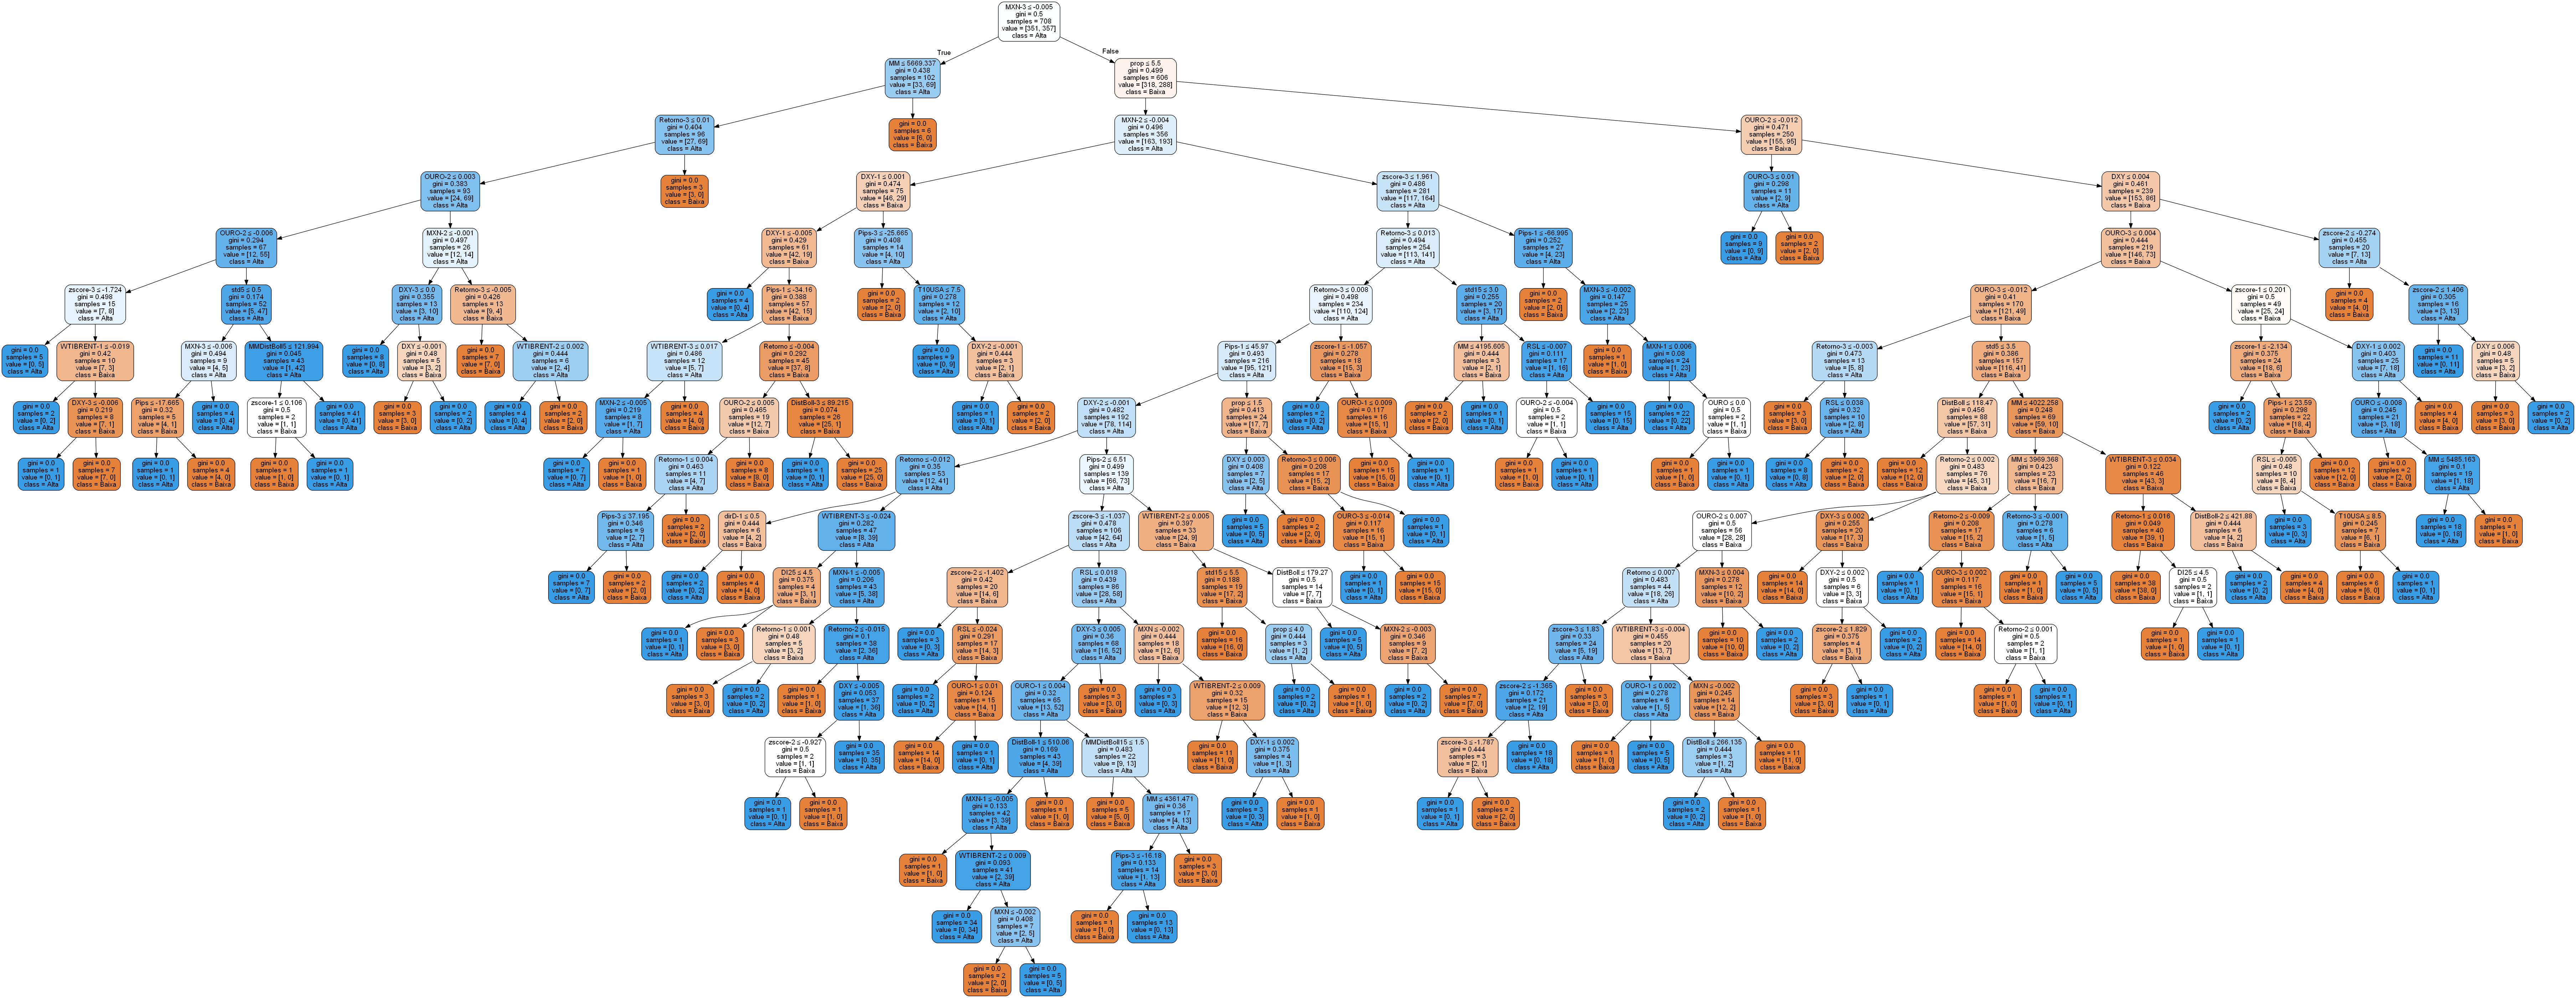

In [87]:
from six import StringIO #from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(modTree
                , out_file = dot_data
                , filled = True
                , rounded = True
                , special_characters = True
                , feature_names = xTrain.columns
                , class_names = ['Baixa', 'Alta'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('arvore3.png')

Image(graph.create_png())

In [88]:
dolTest.loc[:,"Previsto"] = predTest

In [89]:
dolTest["Previsto"].astype(str)

Data
2020-07-01    0
2020-08-01    1
2020-09-01    1
2020-10-01    1
2020-07-02    1
             ..
2021-06-29    1
2021-06-30    0
2021-01-07    0
2021-02-07    1
2021-05-07    1
Name: Previsto, Length: 238, dtype: object

In [90]:
# ajustando o retorno em pips com o resultado do modelo

# variação em Pips
dolTest["Pips"] = (dolTest["Fechamento"].shift(1) - dolTest["Fechamento"])
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Alta", dolTest.loc[:,'Pips'], '0')
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])

KeyError: 'Fechamento'

In [ ]:
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)

In [ ]:
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()

In [ ]:
dolTest.loc[:,"RetPipsAcumulado"].tail()

In [ ]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

# Passo 9 - Aperfeiçoamento do modelo

In [ ]:
#doltest = dolTest.drop(["Pips"], axis = 1)

In [168]:
from sklearn.tree import DecisionTreeClassifier

modTree = DecisionTreeClassifier(criterion = "gini", random_state=42, max_depth = 12) #23

modTree.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=12)

In [169]:
predTest = modTree.predict(xTest)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))
import sklearn.metrics as metrics

print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[60 58]
 [56 64]]

------------------------------------------------

              precision    recall  f1-score   support

           0       0.52      0.51      0.51       118
           1       0.52      0.53      0.53       120

    accuracy                           0.52       238
   macro avg       0.52      0.52      0.52       238
weighted avg       0.52      0.52      0.52       238

Acurácia:  52.101


In [151]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [152]:
#from six import StringIO #from sklearn.externals.six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()

#export_graphviz(modTree
#                , out_file = dot_data
#                , filled = True
#                , rounded = True
#                , special_characters = True
#                , feature_names = xTrain.columns
#                , class_names = ['Baixa', 'Alta'])
#
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#
#graph.write_png('Narvore3.png')
#
#Image(graph.create_png())

In [125]:
dolTest.loc[:,"Previsto"] = predTest

dolTest["Previsto"].value_counts(normalize=True)*100

C:\Users\dalto\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Baixa    54.407295
Alta     45.592705
Name: Previsto, dtype: float64

In [126]:
#dolTest["Previsto"].astype(str)
dolTest["Previsto"].tail(11)

Data
2021-08-11    Baixa
2021-08-12     Alta
2021-08-13    Baixa
2021-08-16     Alta
2021-08-17    Baixa
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23     Alta
2021-08-24     Alta
2021-08-25    Baixa
Name: Previsto, dtype: object

In [127]:
dolTest["Alvo"].tail(11)

Data
2021-08-11     Alta
2021-08-12    Baixa
2021-08-13     Alta
2021-08-16     Alta
2021-08-17     Alta
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23    Baixa
2021-08-24    Baixa
2021-08-25    Baixa
Name: Alvo, dtype: object

In [78]:
# ajustando o retorno em pips com o resultado do modelo

dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Alta", dolTest.loc[:,'Pips'], '0')
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])

In [79]:
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)

In [80]:
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()

In [81]:
dolTest.loc[:,"RetPipsAcumulado"].tail()

Data
2021-08-19    2994.78
2021-08-20    2952.28
2021-08-23    2957.28
2021-08-24    3088.28
2021-08-25    3127.78
Name: RetPipsAcumulado, dtype: float64

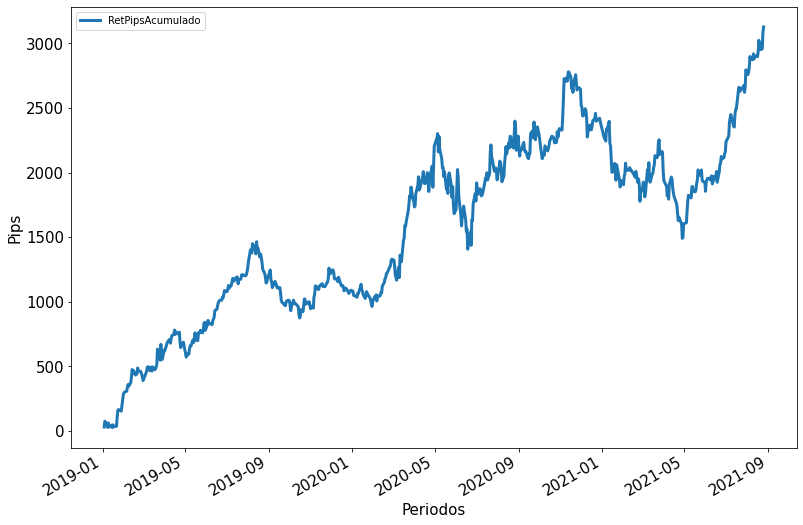

In [82]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

In [ ]:
# EXPORTANDO A BASE DE DADOS

#dfTest.to_csv("resultados_arvore.csv", index = True, header = True)

In [ ]:
dol.tail(3)

In [ ]:
hoje = pd.Series( data = {"Abertura": 1.119, "Máxima" : 1.1200, "Mínima" : 1.155, "Fechamento" : 1.16}, name = "2021-08-16")

dol = dol.append(hoje, ignore_index = False)

df.tail(3)